## Librerías

In [4]:
# Para que las funciones se actualicen sin tener que refrescar el kernel
%load_ext autoreload
%autoreload 2

# Funciones de visualización y curación
import pandas as pd
import json
from os.path import exists
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress as LR
from scipy.stats import skew, kurtosis, skewtest, kurtosistest

# Funciones de clustering
from sklearn import manifold, preprocessing, decomposition
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Funciones propias
from utils_limpieza import * 

# Clear preferencias
plt.rcdefaults()
pd.reset_option('^display\.float_format')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Definir grupos de variables:

basics = ['ID', 'Subrubro', 'Modelo']

F_Com = ['F_pct_Com_1905', 'F_pct_Com_1906', 'F_pct_Com_1907', 'F_pct_Com_1908', 
          'F_pct_Com_1909', 'F_pct_Com_1910', 'F_pct_Com_1911', 'F_pct_Com_1912',
          'F_pct_Com_2001', 'F_pct_Com_2002', 'F_pct_Com_2003', 'F_pct_Com_2004',
          'F_pct_Com_2005', 'F_pct_Com_2006', 'F_pct_Com_2007', 'F_pct_Com_2008',
          'F_pct_Com_2009', 'F_pct_Com_2010', 'F_pct_Com_2011', 'F_pct_Com_2012',
          'F_pct_Com_2101', 'F_pct_Com_2102', 'F_pct_Com_2103', 'F_pct_Com_2104',
          'F_pct_Com_2105', 'F_pct_Com_2106', 'F_pct_Com_2107', 'F_pct_Com_2108',
          'F_pct_Com_2109', 'F_pct_Com_2110', 'F_pct_Com_2111', 'F_pct_Com_2112',
          'F_pct_Com_2201', 'F_pct_Com_2202', 'F_pct_Com_2203', 'F_pct_Com_2204',
          'F_pct_Com_2205', 'F_pct_Com_2206']

F_Ven = ['F_pct_Ven_1905', 'F_pct_Ven_1906', 'F_pct_Ven_1907', 'F_pct_Ven_1908', 
          'F_pct_Ven_1909', 'F_pct_Ven_1910', 'F_pct_Ven_1911', 'F_pct_Ven_1912',
          'F_pct_Ven_2001', 'F_pct_Ven_2002', 'F_pct_Ven_2003', 'F_pct_Ven_2004',
          'F_pct_Ven_2005', 'F_pct_Ven_2006', 'F_pct_Ven_2007', 'F_pct_Ven_2008',
          'F_pct_Ven_2009', 'F_pct_Ven_2010', 'F_pct_Ven_2011', 'F_pct_Ven_2012',
          'F_pct_Ven_2101', 'F_pct_Ven_2102', 'F_pct_Ven_2103', 'F_pct_Ven_2104',
          'F_pct_Ven_2105', 'F_pct_Ven_2106', 'F_pct_Ven_2107', 'F_pct_Ven_2108',
         'F_pct_Ven_2109', 'F_pct_Ven_2110', 'F_pct_Ven_2111', 'F_pct_Ven_2112',
         'F_pct_Ven_2201', 'F_pct_Ven_2202', 'F_pct_Ven_2203', 'F_pct_Ven_2204',
          'F_pct_Ven_2205', 'F_pct_Ven_2206']

Y_Com = ['Y_pct_Com_2001', 'Y_pct_Com_2002', 'Y_pct_Com_2003', 'Y_pct_Com_2004',
          'Y_pct_Com_2005', 'Y_pct_Com_2006', 'Y_pct_Com_2007', 'Y_pct_Com_2008',
          'Y_pct_Com_2009', 'Y_pct_Com_2010', 'Y_pct_Com_2011', 'Y_pct_Com_2012',
          'Y_pct_Com_2101', 'Y_pct_Com_2102', 'Y_pct_Com_2103', 'Y_pct_Com_2104',
          'Y_pct_Com_2105', 'Y_pct_Com_2106', 'Y_pct_Com_2107', 'Y_pct_Com_2108',
          'Y_pct_Com_2109', 'Y_pct_Com_2110', 'Y_pct_Com_2111', 'Y_pct_Com_2112',
          'Y_pct_Com_2201', 'Y_pct_Com_2202', 'Y_pct_Com_2203', 'Y_pct_Com_2204',
          'Y_pct_Com_2205', 'Y_pct_Com_2206']

Y_Ven = ['Y_pct_Ven_2001', 'Y_pct_Ven_2002', 'Y_pct_Ven_2003', 'Y_pct_Ven_2004',
          'Y_pct_Ven_2005', 'Y_pct_Ven_2006', 'Y_pct_Ven_2007', 'Y_pct_Ven_2008',
          'Y_pct_Ven_2009', 'Y_pct_Ven_2010', 'Y_pct_Ven_2011', 'Y_pct_Ven_2012',
          'Y_pct_Ven_2101', 'Y_pct_Ven_2102', 'Y_pct_Ven_2103', 'Y_pct_Ven_2104',
          'Y_pct_Ven_2105', 'Y_pct_Ven_2106', 'Y_pct_Ven_2107', 'Y_pct_Ven_2108',
          'Y_pct_Ven_2109', 'Y_pct_Ven_2110', 'Y_pct_Ven_2111', 'Y_pct_Ven_2112',
          'Y_pct_Ven_2201', 'Y_pct_Ven_2202', 'Y_pct_Ven_2203', 'Y_pct_Ven_2204',
          'Y_pct_Ven_2205', 'Y_pct_Ven_2206']

### DBSCAN y solo las variables F_Ven

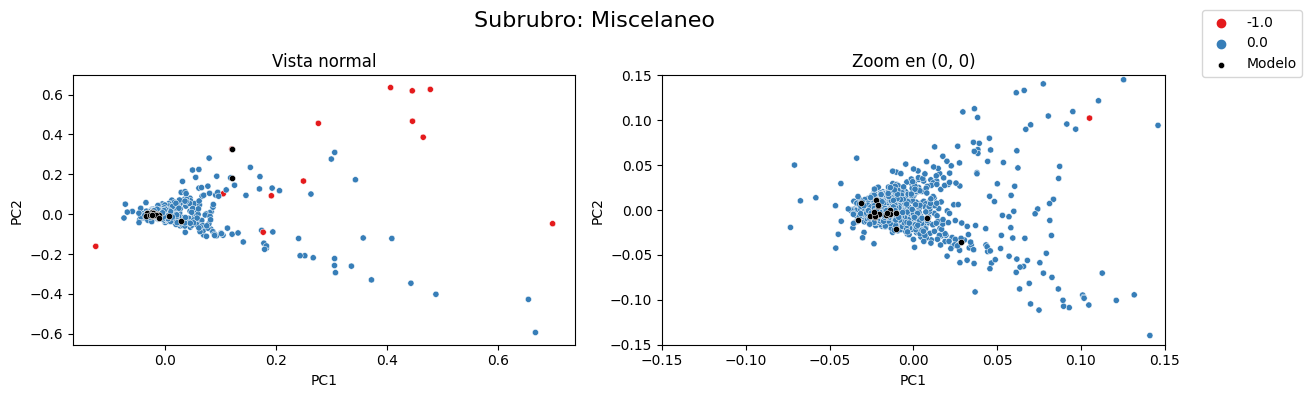

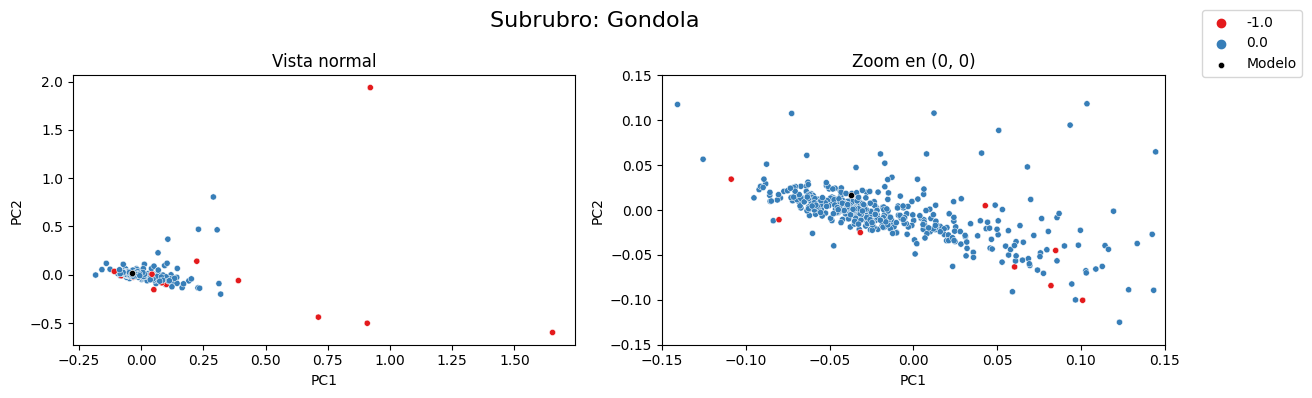

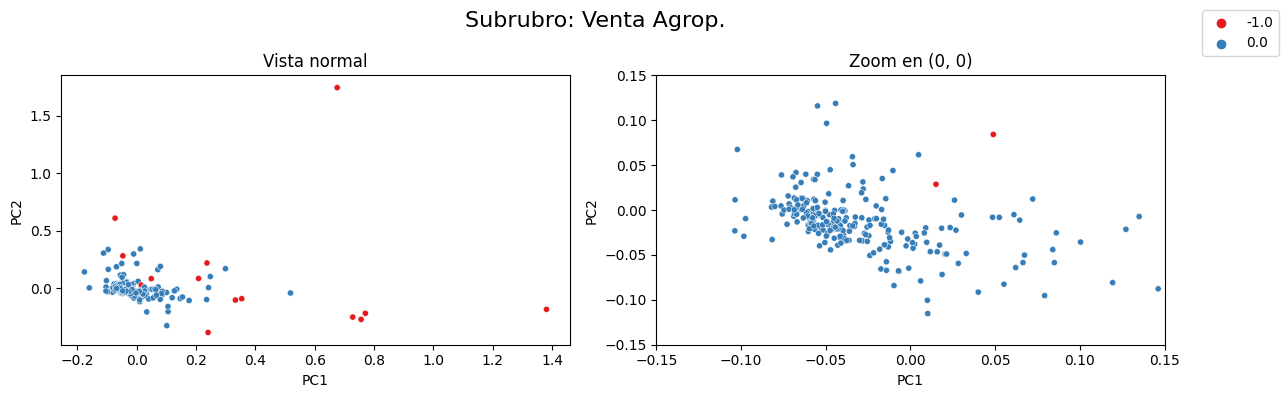

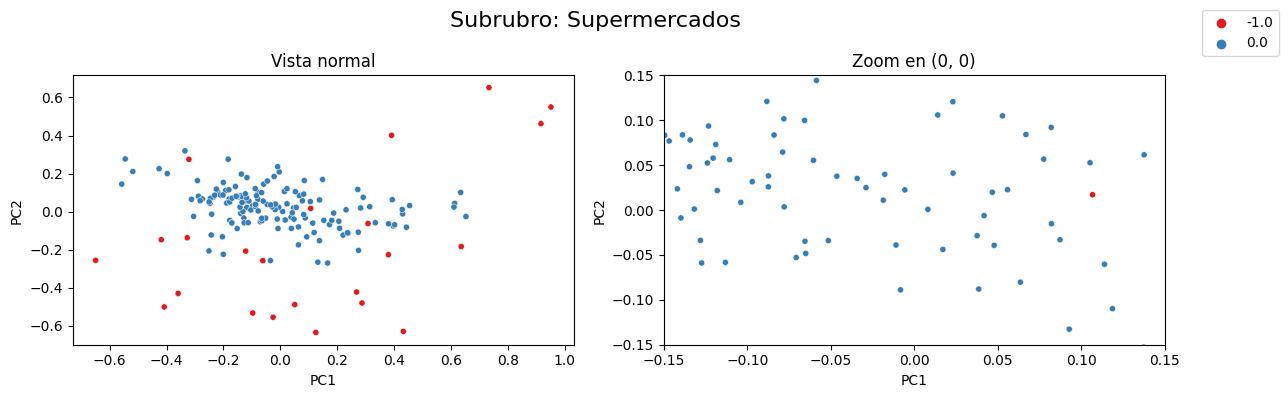

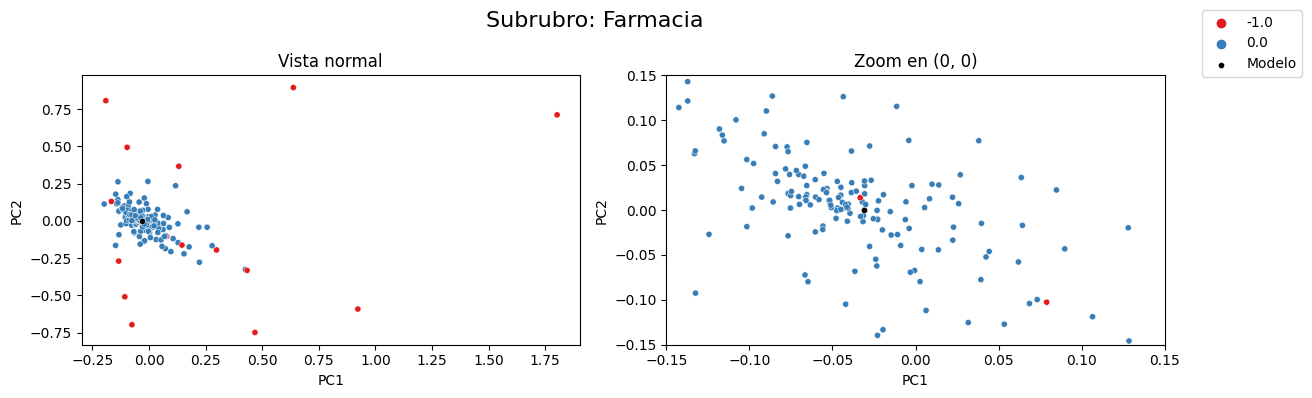

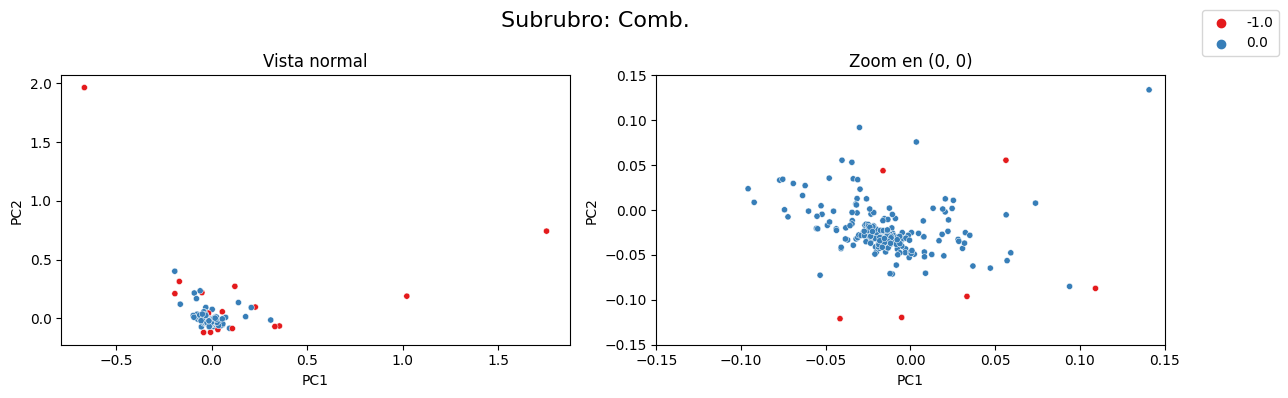

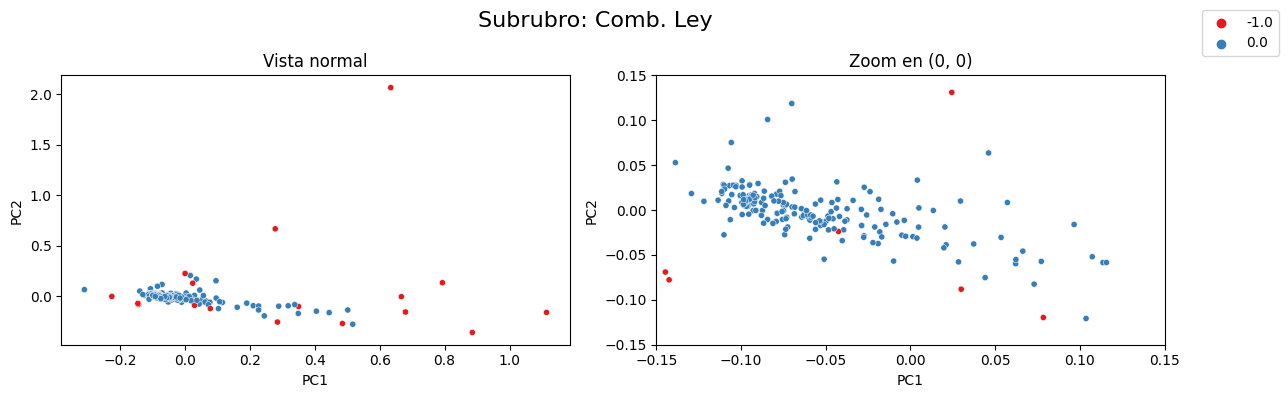

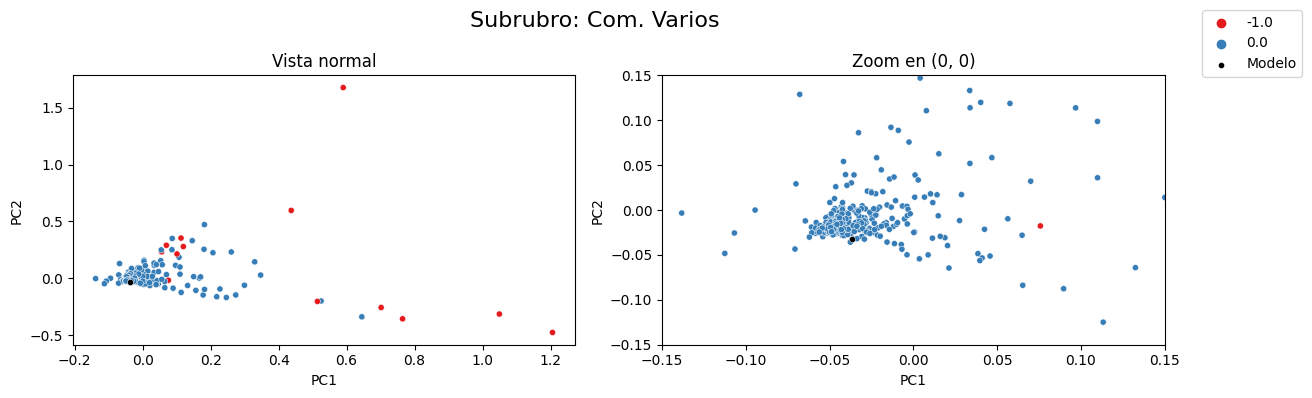

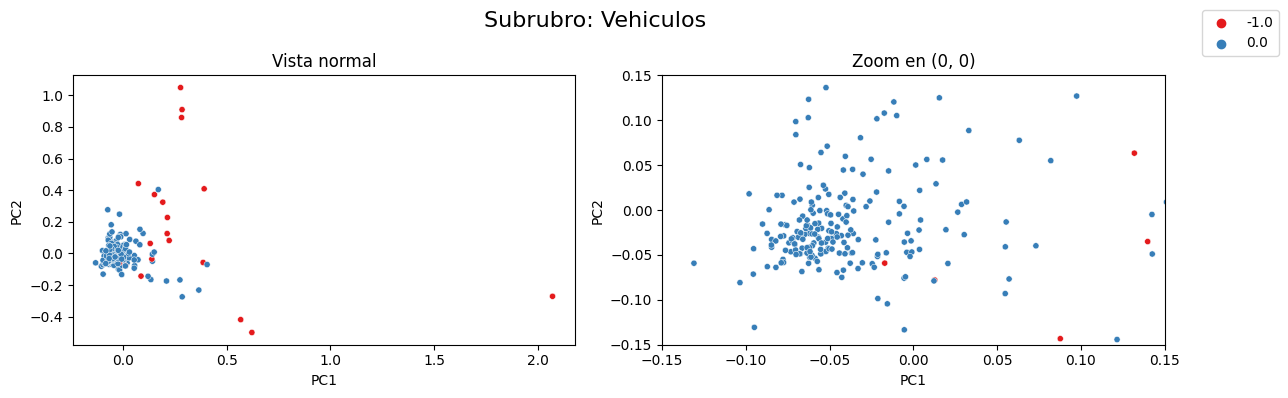

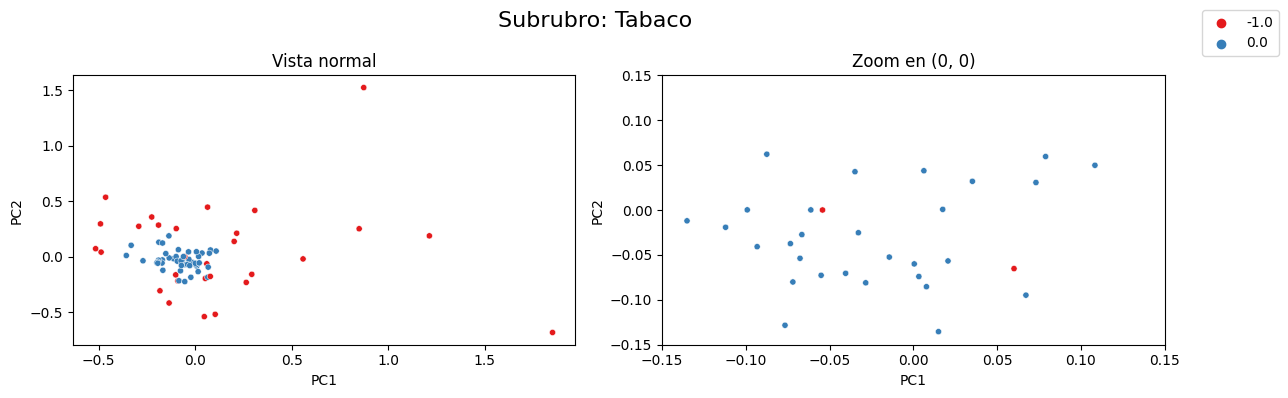

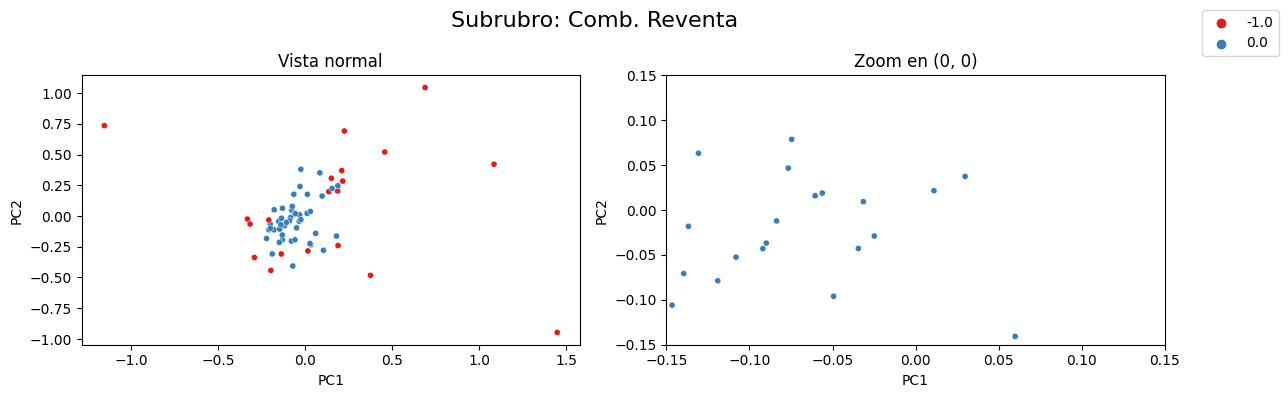

In [6]:
# Este dataset proviene justo antes de imputar por 0 (para poder elegir acá cuál imputación utilizar)
# En la notebook clustering1.ipynb, en la sección de "Aplicación de decisiones", justo antes de la subsección "Imputar con ceros"

vectores = pd.read_csv('../data/interim/base.csv') 

# Imputar con promedio (columnas)
vectores[F_Ven] = vectores[F_Ven].fillna(vectores[F_Ven].mean()).copy()

# Imputar con promedio (filas)
#b = vectores[basics].copy()
#f = vectores[F_Ven].copy()
#f = f.T
#f = f.fillna(f.mean()).copy()
#f = f.T
#vectores = resultado = pd.concat([b, f], axis=1)

# Imputar con cero
#vectores = vectores.copy()
#vectores[F_Ven] = vectores[F_Ven].fillna(0).copy()

# Identificar subrubros
unique_subrubros = vectores['Subrubro'].unique()

# Itera sobre los subrubros únicos y crea gráficos para cada uno
for subrubro in unique_subrubros:
    subrubro_df = vectores[vectores['Subrubro'] == subrubro].copy()
    
    # Escala MinMax
    scaler = MinMaxScaler()
    subrubro_df[F_Ven] = scaler.fit_transform(subrubro_df[F_Ven])

    # PCA de 12 componentes
    pca = decomposition.PCA(n_components=12)
    pca.fit(subrubro_df[F_Ven])
    subrubro_df_pca = pca.transform(subrubro_df[F_Ven])
    subrubro_df_pca = pd.DataFrame(data=subrubro_df_pca, columns=[f'PC{i}' for i in range(1, 13)]).copy()

    # Nro de clusters recomendado por el codo
    scores = [KMeans(n_clusters=i, n_init=10).fit(subrubro_df_pca).inertia_ for i in range(2, 12)]
    differences = np.diff(scores)
    recommended_num_clusters = np.where(differences == max(differences))[0][0] + 2

    # DBSCAN
    db = DBSCAN(eps=0.5, min_samples=5)
    db.fit(subrubro_df_pca)
    clusters = db.labels_

    # PCA de 2 componentes para visualizar
    pca = decomposition.PCA(n_components=2)
    pca.fit(subrubro_df_pca)
    subrubro_df_pca_2 = pca.transform(subrubro_df_pca)  # numpy array
    subrubro_df_pca_2 = pd.DataFrame(data=subrubro_df_pca_2, columns=[f'PC{i}' for i in range(1, 3)]).copy()
    subrubro_df_clusters = subrubro_df_pca_2.copy()
    subrubro_df_clusters['db_n'] = db.labels_
    subrubro_df_clusters = pd.concat([subrubro_df[basics], subrubro_df_clusters], axis=1)

    # Gráfico
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Subrubro: {subrubro}", fontsize=16)
    axs[0].set_title("Vista normal")
    axs[1].set_title("Zoom en (0, 0)")
    for ax in axs:
        sns.scatterplot(data=subrubro_df_clusters, x='PC1', y='PC2', hue='db_n', palette='Set1', s=20, ax=ax)
    filt_modelo_1 = subrubro_df_clusters['Modelo'] == 1
    for ax in axs:
        sns.scatterplot(data=subrubro_df_clusters[filt_modelo_1], x='PC1', y='PC2', color='black', s=20, label='Modelo', ax=ax)
    axs[1].set_xlim(-0.15, 0.15)
    axs[1].set_ylim(-0.15, 0.15)
    for ax in axs:
        ax.get_legend().remove()
    handles, labels = axs[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

### DBSCAN y todas las variables a la vez

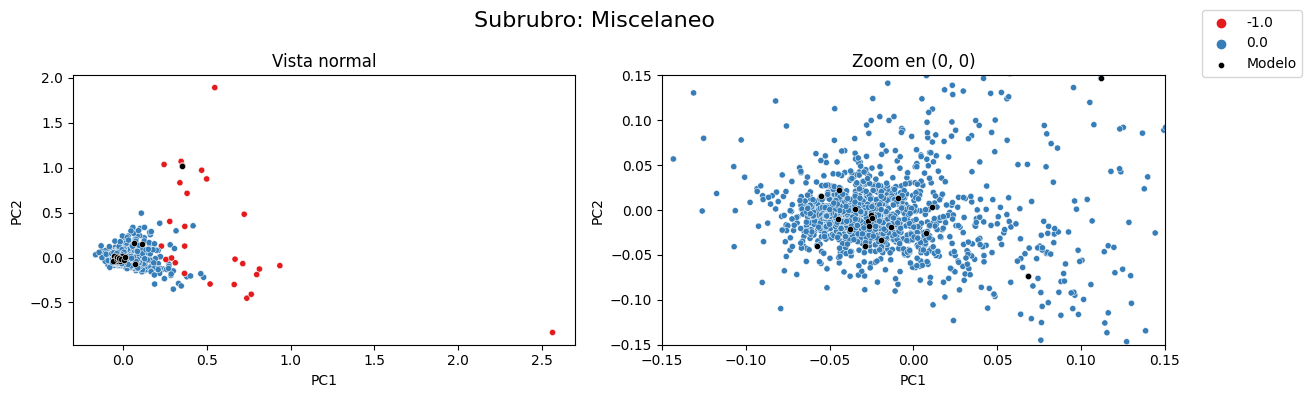

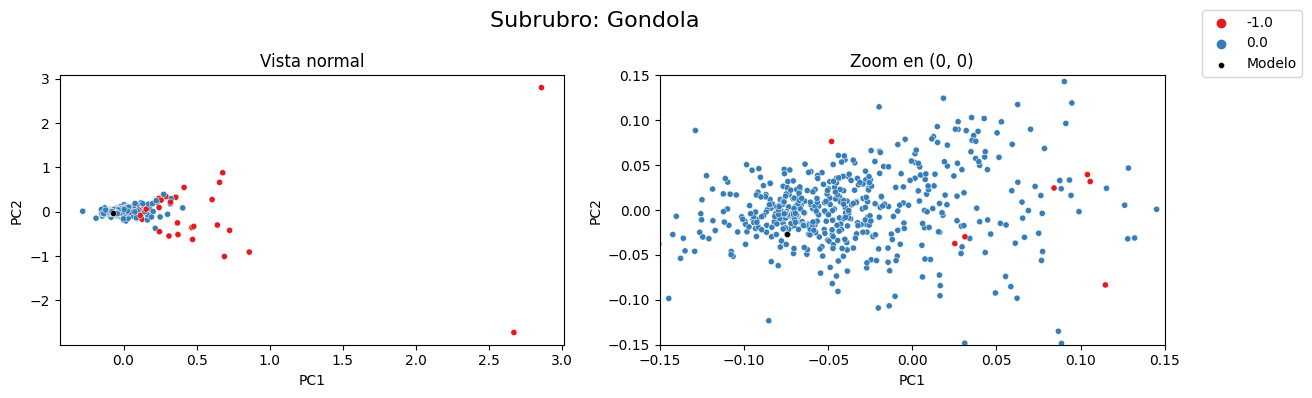

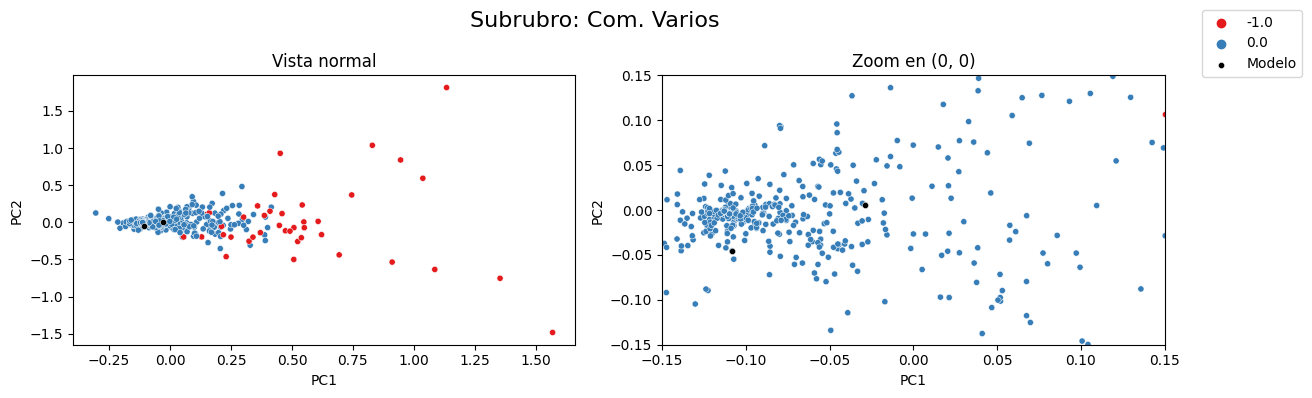

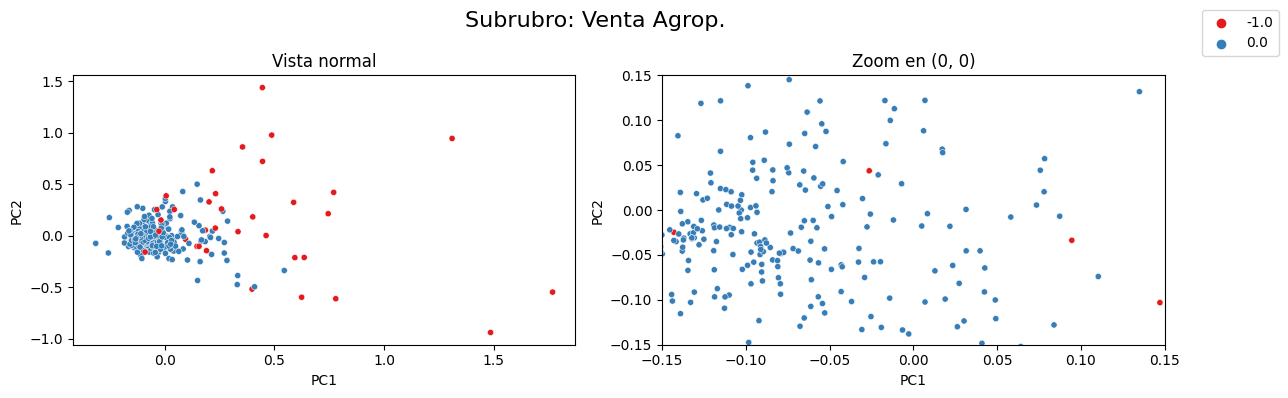

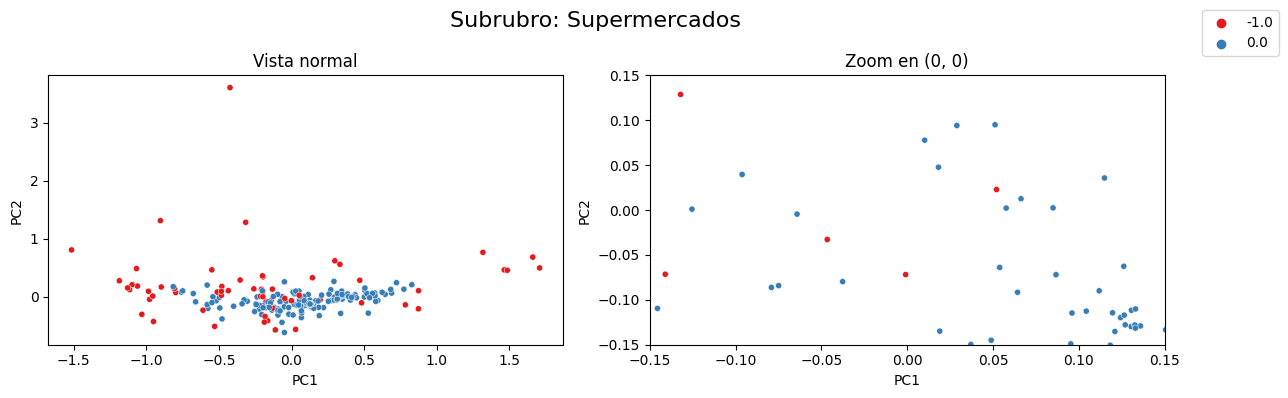

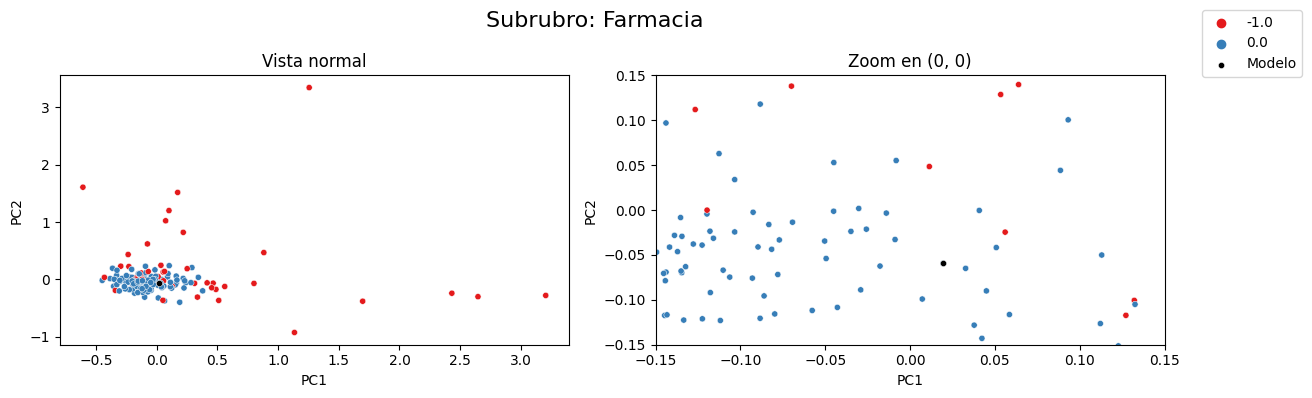

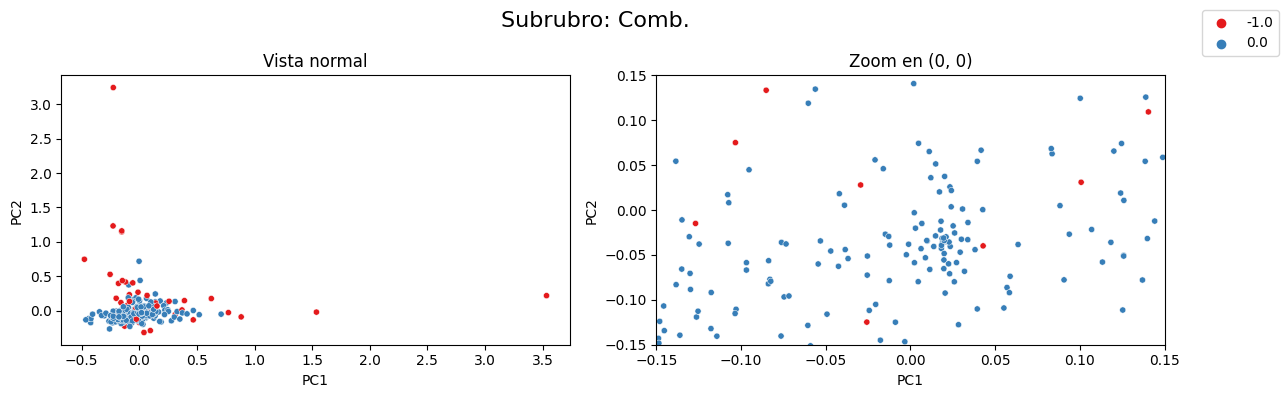

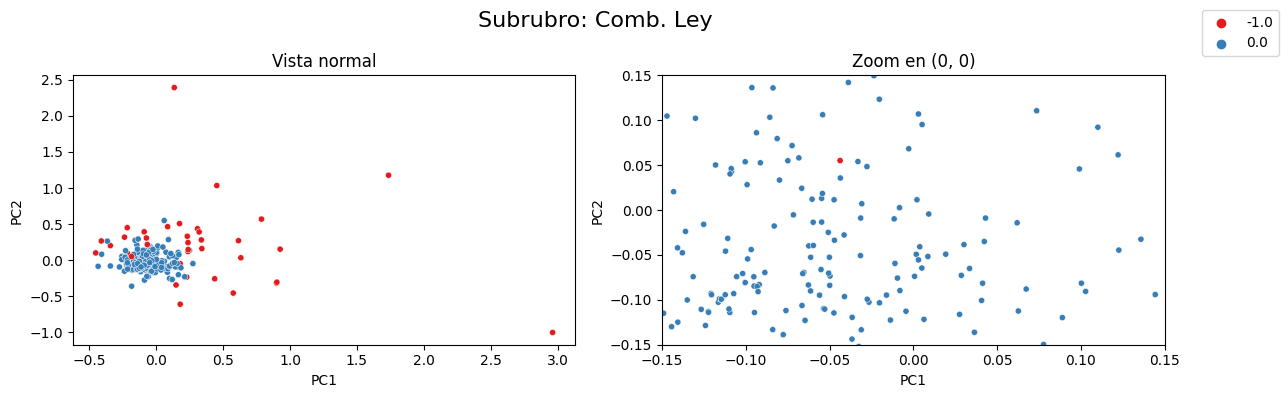

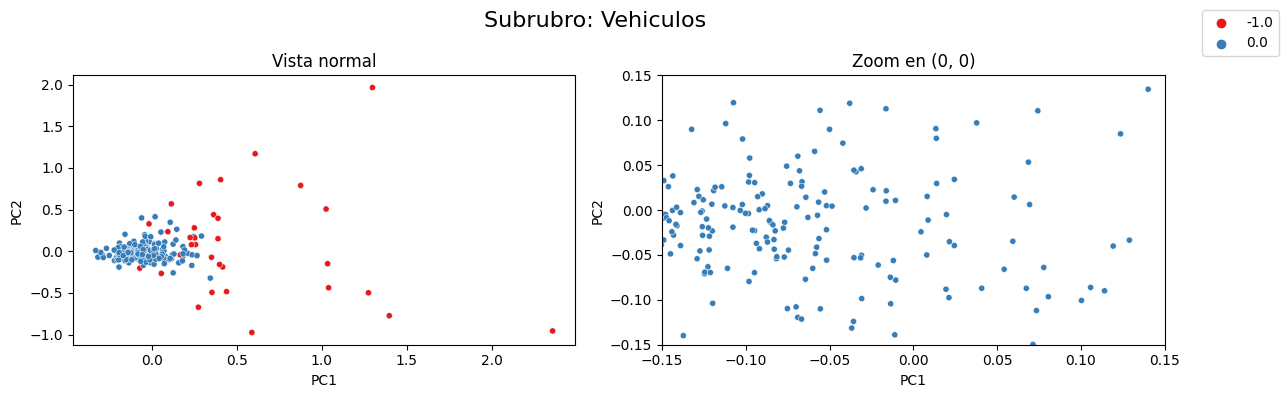

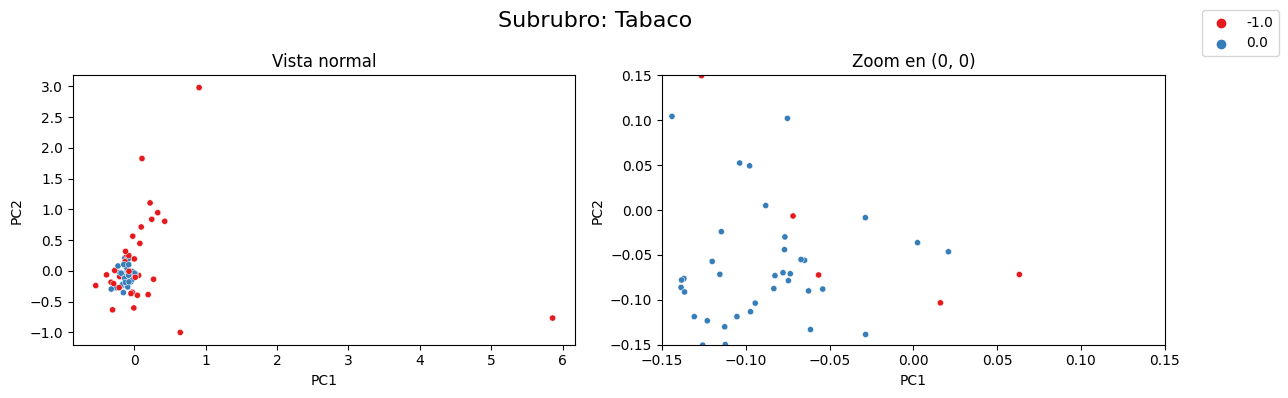

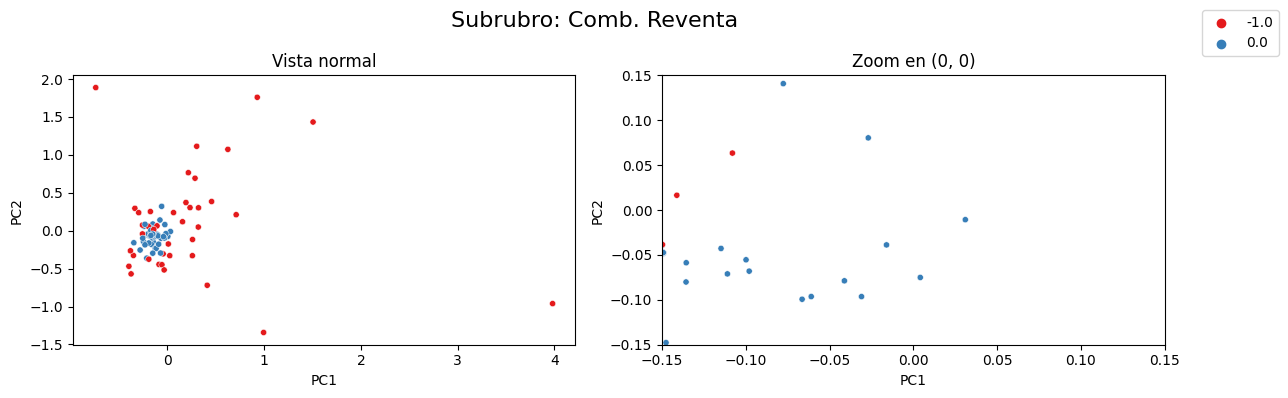

In [8]:
# Este dataset proviene de antes de hacer todo el tratamiento de vacíos
# Ya está creado
vectores = pd.read_csv('../data/interim/tp3_vendedores_vector.csv')
vectores = limpiar_basic(vectores, cols_drop='Omega')
vectores = vectores[basics+Y_Ven+Y_Com+F_Ven+F_Com].copy()

# Imputar con promedio (columnas)
#vectores[Y_Ven+Y_Com+F_Ven+F_Com] = vectores[Y_Ven+Y_Com+F_Ven+F_Com].fillna(vectores[Y_Ven+Y_Com+F_Ven+F_Com].mean()).copy()
#vectores

# Imputar con cero
vectores = vectores.copy()
vectores[Y_Ven+Y_Com+F_Ven+F_Com] = vectores[Y_Ven+Y_Com+F_Ven+F_Com].fillna(0).copy()
vectores

# Identificar subrubros
unique_subrubros = vectores['Subrubro'].unique()

# Itera sobre los subrubros únicos y crea gráficos para cada uno
for subrubro in unique_subrubros:
    subrubro_df = vectores[vectores['Subrubro'] == subrubro].copy()
    
    # Escala MinMax
    scaler = MinMaxScaler()
    subrubro_df[Y_Ven+Y_Com+F_Ven+F_Com] = scaler.fit_transform(subrubro_df[Y_Ven+Y_Com+F_Ven+F_Com])

    # PCA de 12 componentes
    pca = decomposition.PCA(n_components=12)
    pca.fit(subrubro_df[Y_Ven+Y_Com+F_Ven+F_Com])
    subrubro_df_pca = pca.transform(subrubro_df[Y_Ven+Y_Com+F_Ven+F_Com])
    subrubro_df_pca = pd.DataFrame(data=subrubro_df_pca, columns=[f'PC{i}' for i in range(1, 13)]).copy()

    # Nro de clusters recomendado por el codo
    scores = [KMeans(n_clusters=i, n_init=10).fit(subrubro_df_pca).inertia_ for i in range(2, 12)]
    differences = np.diff(scores)
    recommended_num_clusters = np.where(differences == max(differences))[0][0] + 2

    # DBSCAN
    db = DBSCAN(eps=0.5, min_samples=5)
    db.fit(subrubro_df_pca)
    clusters = db.labels_

    # PCA de 2 componentes para visualizar
    pca = decomposition.PCA(n_components=2)
    pca.fit(subrubro_df_pca)
    subrubro_df_pca_2 = pca.transform(subrubro_df_pca)  # numpy array
    subrubro_df_pca_2 = pd.DataFrame(data=subrubro_df_pca_2, columns=[f'PC{i}' for i in range(1, 3)]).copy()
    subrubro_df_clusters = subrubro_df_pca_2.copy()
    subrubro_df_clusters['db_n'] = db.labels_
    subrubro_df_clusters = pd.concat([subrubro_df[basics], subrubro_df_clusters], axis=1)

    # Gráfico
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"Subrubro: {subrubro}", fontsize=16)
    axs[0].set_title("Vista normal")
    axs[1].set_title("Zoom en (0, 0)")
    for ax in axs:
        sns.scatterplot(data=subrubro_df_clusters, x='PC1', y='PC2', hue='db_n', palette='Set1', s=20, ax=ax)
    filt_modelo_1 = subrubro_df_clusters['Modelo'] == 1
    for ax in axs:
        sns.scatterplot(data=subrubro_df_clusters[filt_modelo_1], x='PC1', y='PC2', color='black', s=20, label='Modelo', ax=ax)
    axs[1].set_xlim(-0.15, 0.15)
    axs[1].set_ylim(-0.15, 0.15)
    for ax in axs:
        ax.get_legend().remove()
    handles, labels = axs[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()